In [183]:
import pandas as pd
import numpy as np
df = pd.read_csv('chapter_3/banksim_adj.csv')

In [184]:
df.fraud.value_counts()

0    6989
1     200
Name: fraud, dtype: int64

In [185]:
X = df.drop(['Unnamed: 0', 'fraud'], axis=1)
y = df[['fraud']]

In [186]:
df

Unnamed: 0  age    amount  fraud  M  es_barsandrestaurants  es_contents  \
0              0    3   49.7100      0  0                      0            0   
1              1    4   39.2900      0  0                      0            0   
2              2    3   18.7600      0  0                      0            0   
3              3    4   13.9500      0  1                      0            0   
4              4    2   49.8700      0  1                      0            0   
...          ...  ...       ...    ... ..                    ...          ...   
7184        7195    5  236.1474      1  1                      0            0   
7185        7196    5  139.6000      1  0                      0            0   
7186        7197    1  236.1474      1  0                      0            0   
7187        7198    1  236.1474      1  1                      0            0   
7188        7199    4  236.1474      1  0                      0            0   

      es_fashion  es_food  es_health  es_home  es_hotelservices  es_hyper  \
0              0        0          0        0                 0         0   
1              0        0          1        0                 0         0   
2              0        0          0        0                 0         0   
3              0        0          0        0                 0         0   
4              0        0          0        0                 0         0   
...          ...      ...        ...      ...               ...       ...   
7184           0        0          0        0                 1         0   
7185           0        0          0        0                 1         0   
7186           0        0          0        0                 0         0   
7187           0        0          0        0                 1         0   
7188           0        0          1        0                 0         0   

      es_leisure  es_otherservices  es_sportsandtoys  es_tech  \
0              0                 0                 0        0   
1              0                 0                 0        0   
2              0                 0                 0        0   
3              0                 0                 0        0   
4              0                 0                 0        0   
...          ...               ...               ...      ...   
7184           0                 0                 0        0   
7185           0                 0                 0        0   
7186           0                 0                 0        0   
7187           0                 0                 0        0   
7188           0                 0                 0        0   

      es_transportation  es_travel  
0                     1          0  
1                     0          0  
2                     1          0  
3                     1          0  
4                     1          0  
...                 ...        ...  
7184                  0          0  
7185                  0          0  
7186                  0          1  
7187                  0          0  
7188                  0          0  

[7189 rows x 19 columns]

In [187]:
X_subset = df.loc[df['fraud']==(1)]
X_subset = X_subset.drop(['Unnamed: 0', 'fraud'], axis=1)

In [188]:
y.value_counts()

fraud
0        6989
1         200
dtype: int64

In [162]:
#scaled_features = X.copy()
scaled_features = X_subset.copy()

col_names = ['age', 'amount']
features = scaled_features[col_names]
scaler = MinMaxScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features[col_names] = features
print(scaled_features)
X_scaled=scaled_features

In [160]:
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.cluster import KMeans
# X = np.array(df).astype(np.float)
# scaler = MinMaxScaler()
# X_scaled = scaler.fit_transform(X)

In [152]:
# https://towardsdatascience.com/explaining-dbscan-clustering-18eaf5c83b31

In [153]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as pyo
pyo.init_notebook_mode()
import plotly.graph_objs as go
from plotly import tools
from plotly.subplots import make_subplots
import plotly.offline as py
import plotly.express as px
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
plt.style.use('fivethirtyeight')
from warnings import filterwarnings
filterwarnings('ignore')


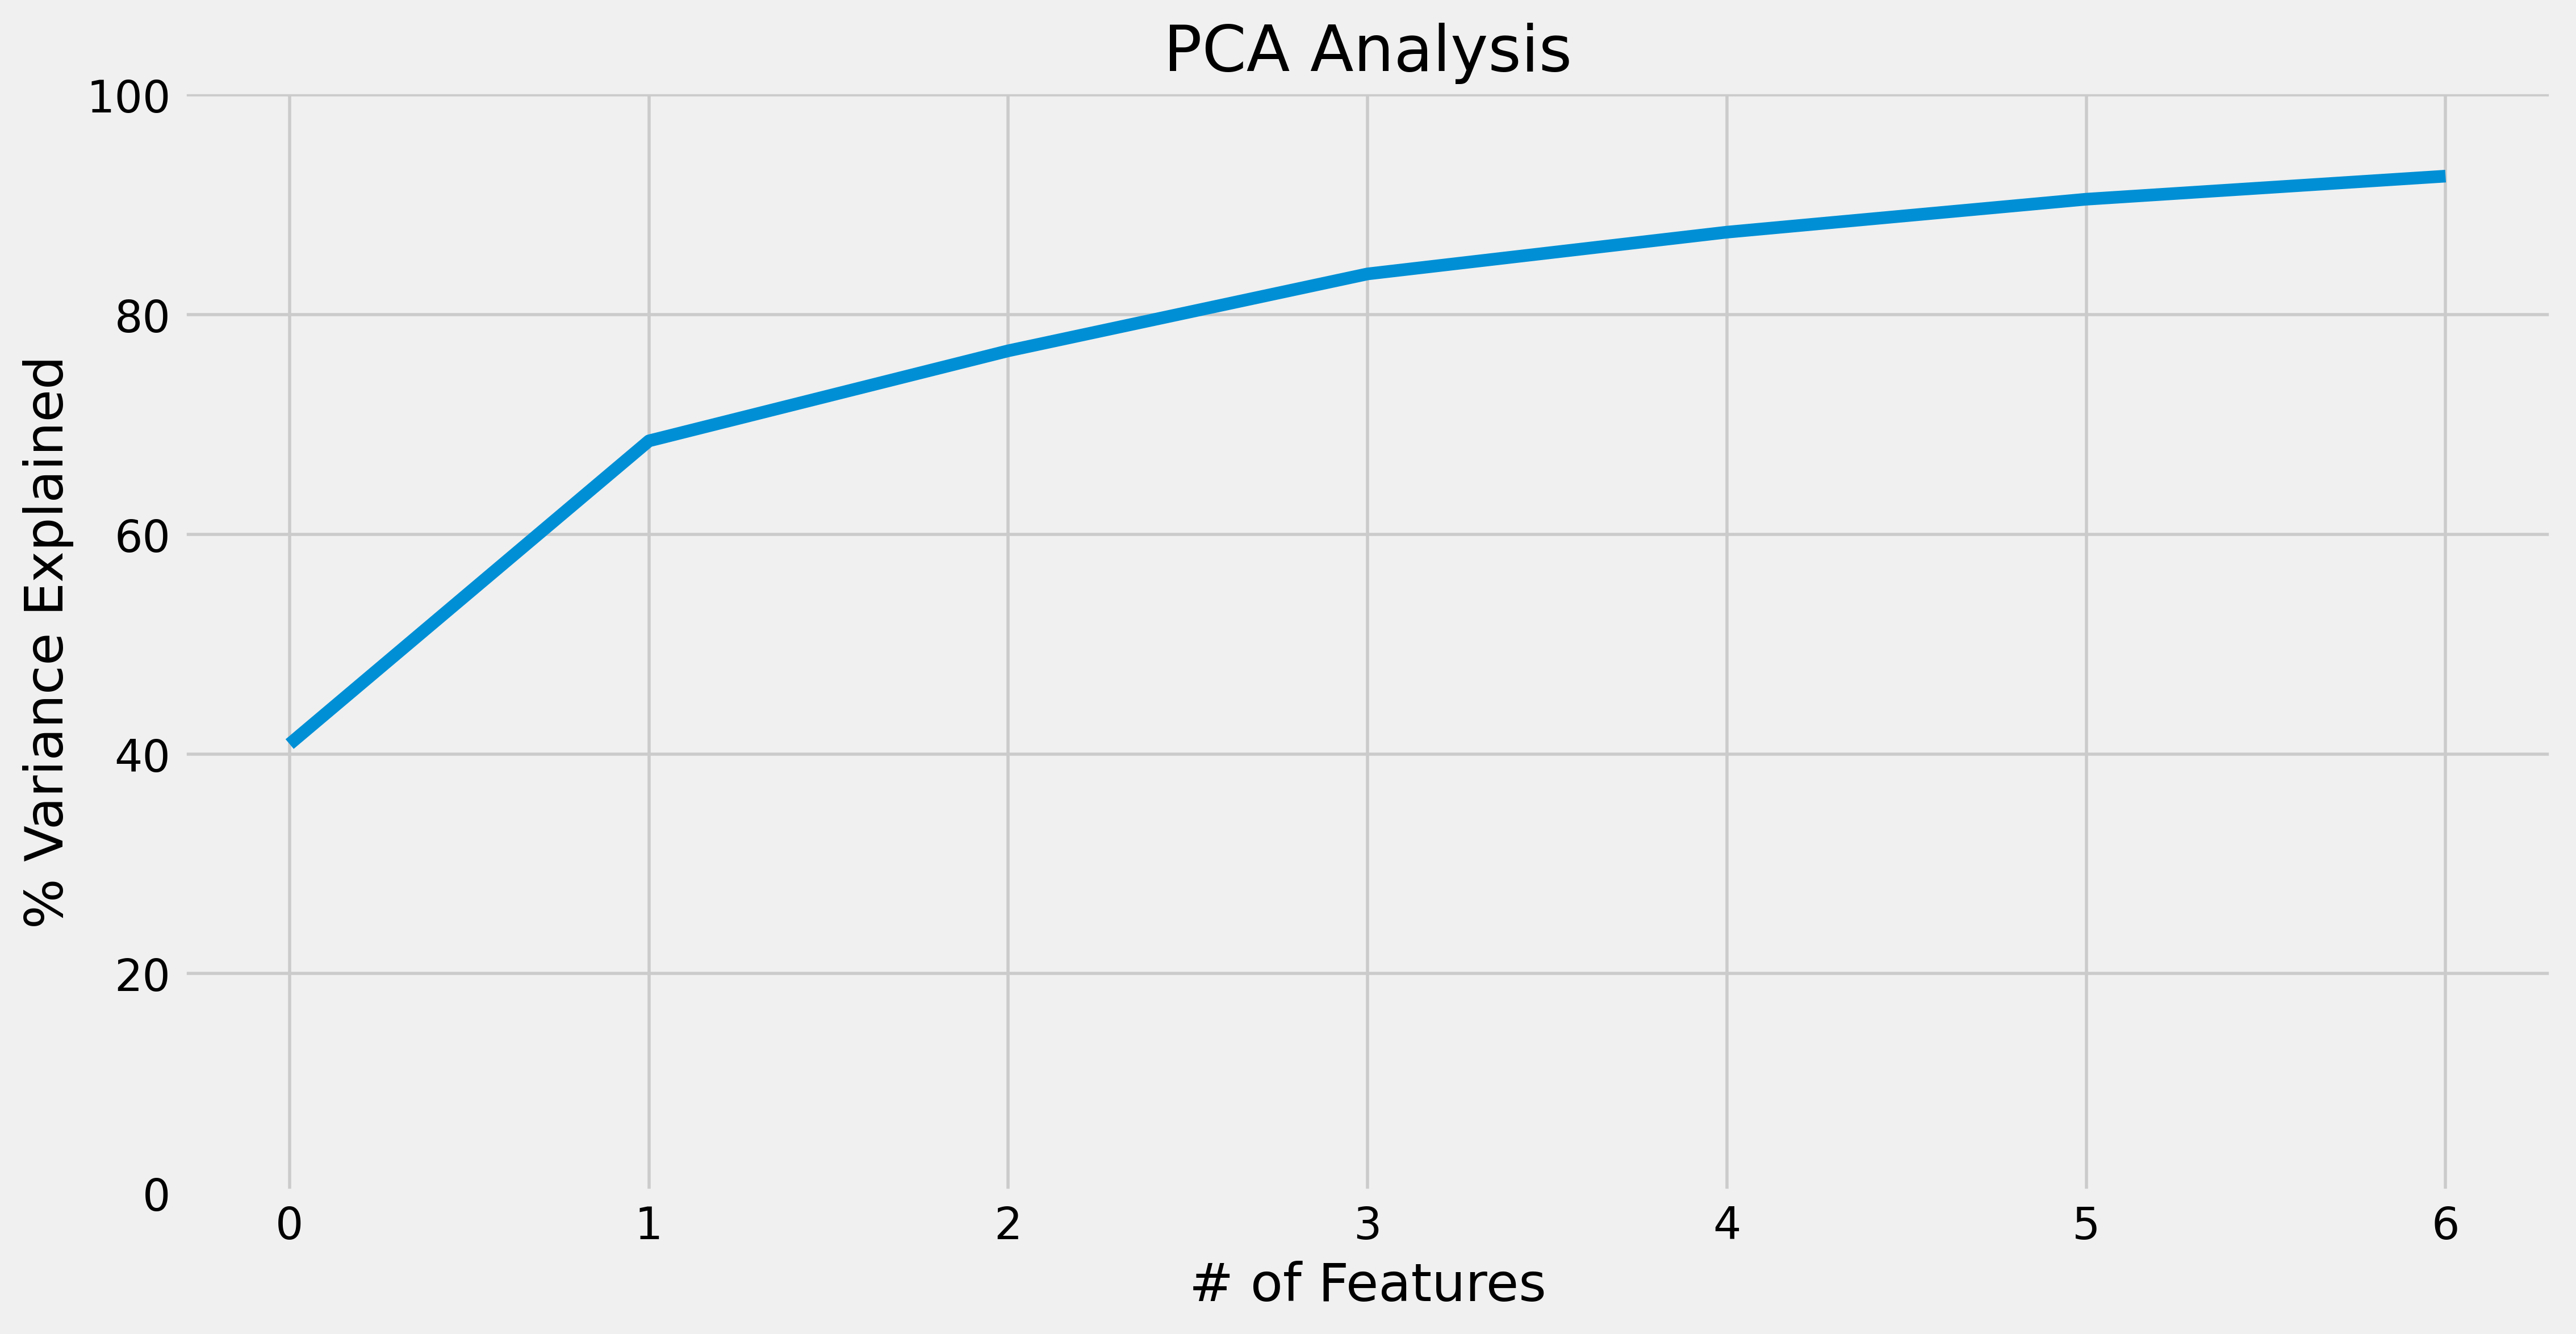

In [154]:
pca = PCA(n_components=7)
#pca.fit(X_scaled)
pca.fit(scaled_features)
variance = pca.explained_variance_ratio_ 
var=np.cumsum(np.round(variance, 3)*100)
plt.figure(figsize=(12,6))
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(0,100.5)
plt.plot(var)

In [155]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
#pca_scale = pca.fit_transform(X_scaled)
X_decomp = pca.fit_transform(X_scaled)
pca_df = pd.DataFrame(pca_scale, columns=['PC1', 'PC2', 'PC3'])

In [156]:
pca_df

PC1       PC2       PC3
0     0.416845 -0.290622  0.430279
1     0.530237  0.771427  0.645383
2     0.413081 -0.324293  0.441800
3    -0.583928 -0.219098  0.441537
4    -0.574014 -0.179218  0.426782
...        ...       ...       ...
7184 -0.415508  1.275110 -0.566135
7185  0.566392  1.059178 -0.527072
7186  0.589611  1.158541 -0.572089
7187 -0.404428  1.276630 -0.568426
7188  0.601840  1.344203 -0.548008

[7189 rows x 3 columns]

In [157]:
Scene = dict(xaxis = dict(title  = 'PC1'),yaxis = dict(title  = 'PC2'),zaxis = dict(title  = 'PC3'))
trace = go.Scatter3d(x=pca_df.iloc[:,0], y=pca_df.iloc[:,1], z=pca_df.iloc[:,2], mode='markers',marker=dict(colorscale='Greys', opacity=0.3, size = 10, ))
layout = go.Layout(margin=dict(l=0,r=0),scene = Scene, height = 1000,width = 1000)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show()

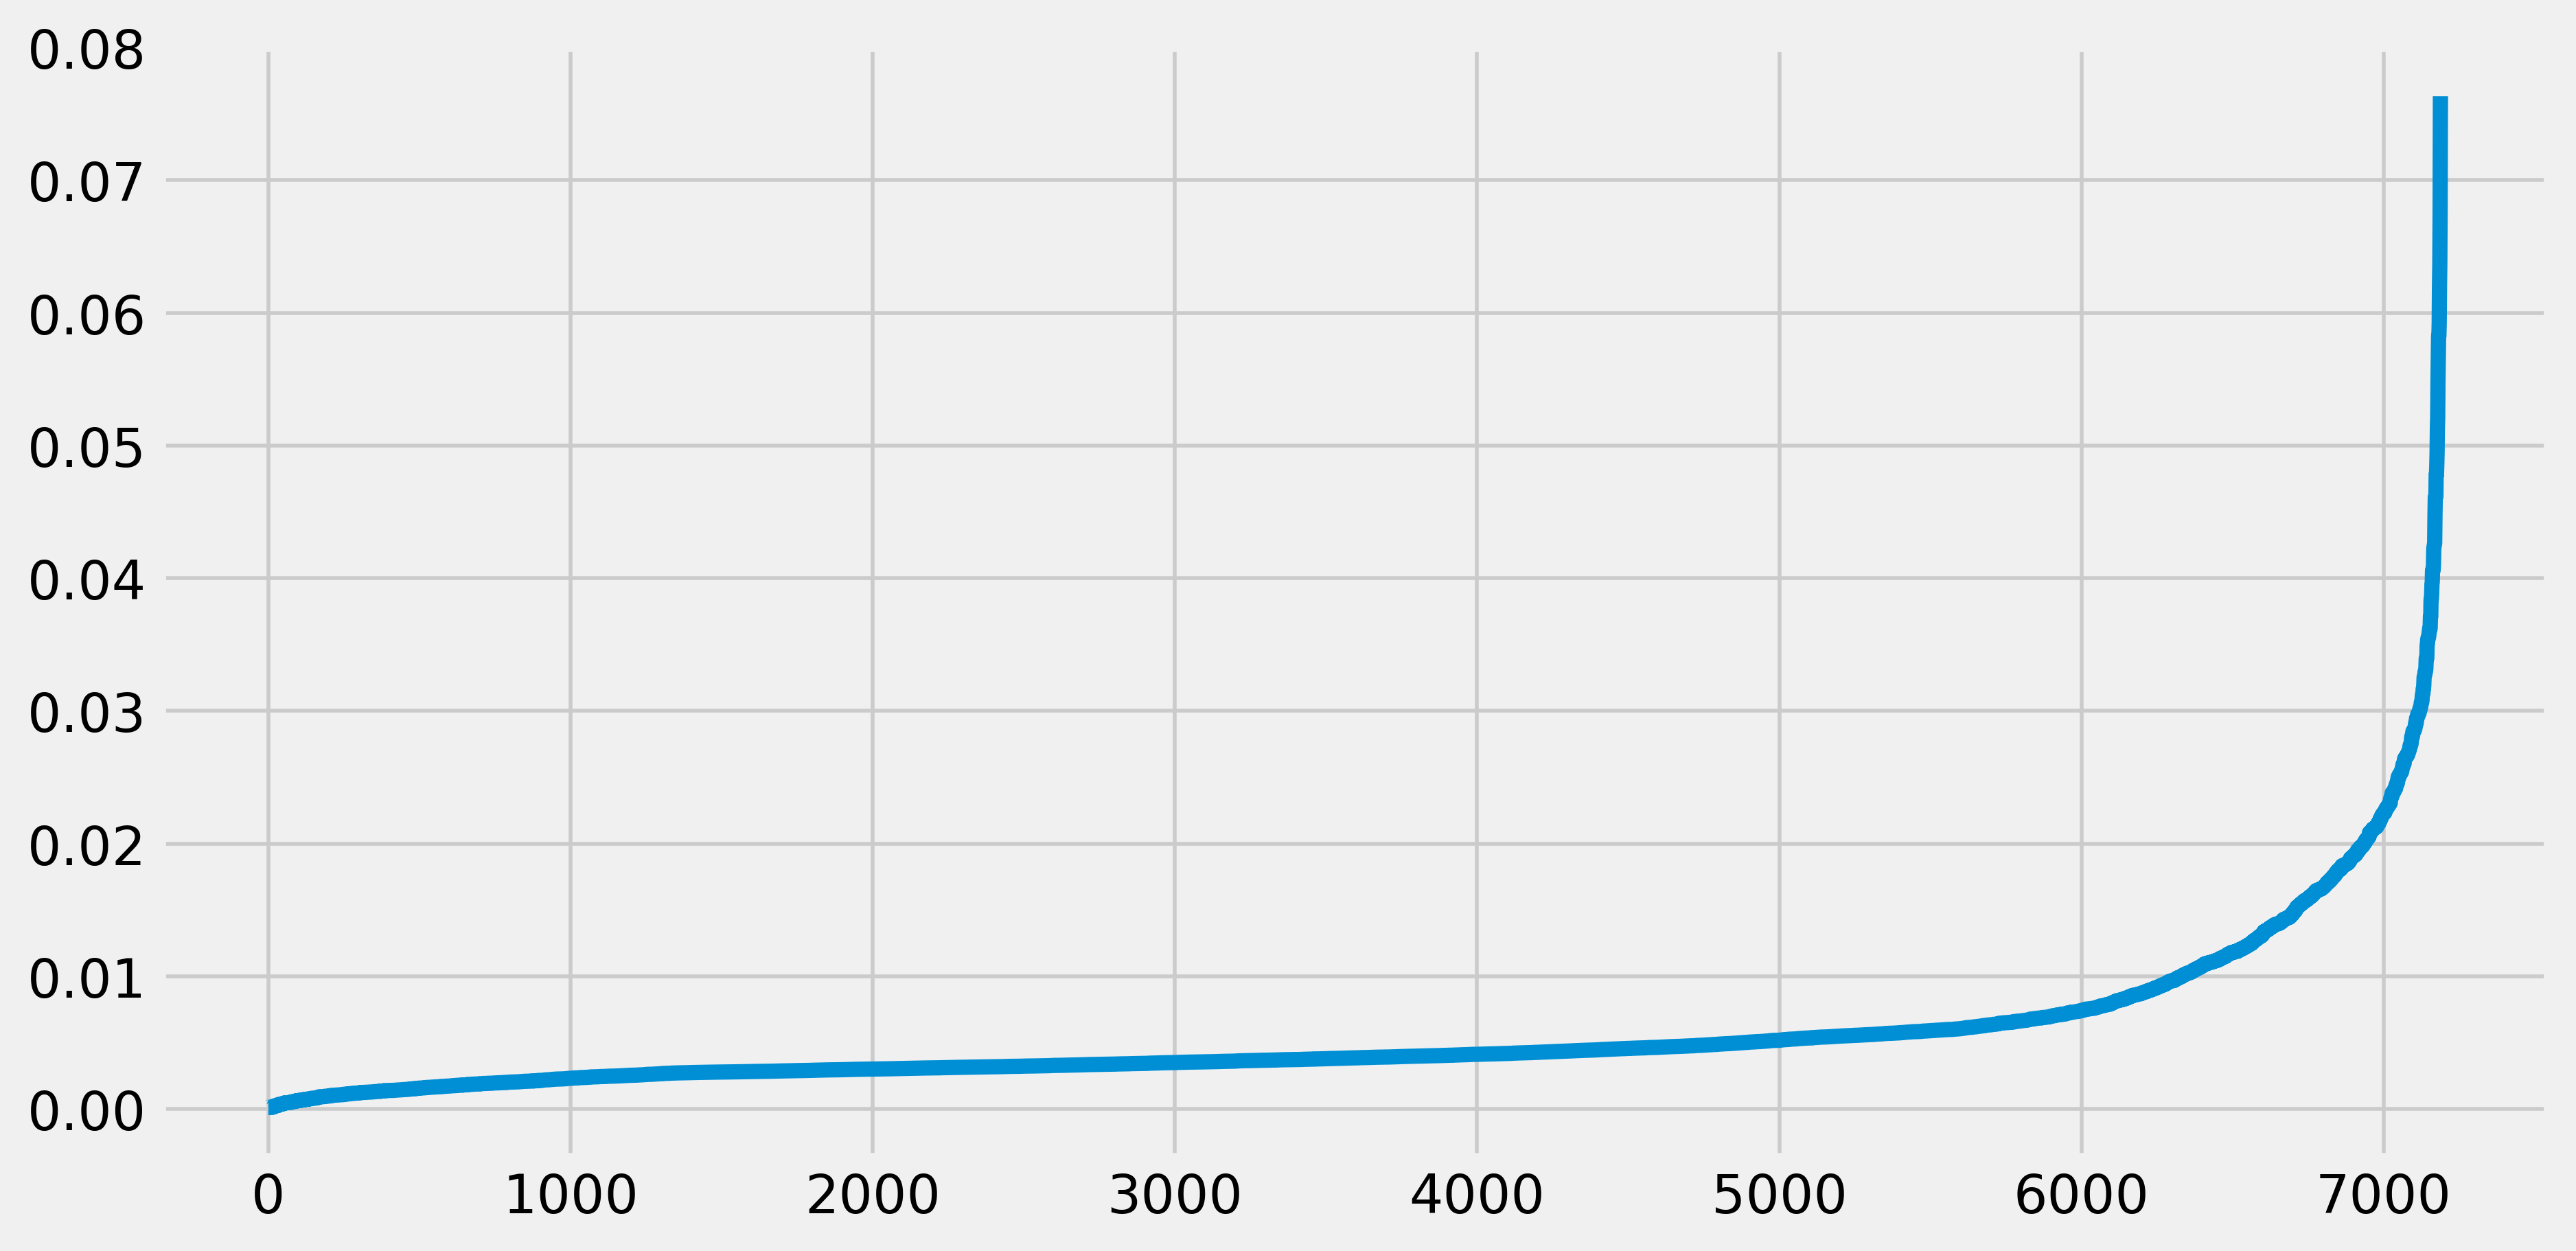

In [145]:
plt.figure(figsize=(10,5))
nn = NearestNeighbors(n_neighbors=5).fit(pca_df)
distances, idx = nn.kneighbors(pca_df)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.show()

In [26]:
# from sklearn.manifold import TSNE
# import matplotlib.pyplot as plt
# import matplotlib as mpl
# mpl.rcParams['figure.dpi']=400
# import math
# plotX = X_scaled
# ps = [10]
# fig,ax =plt.subplots(3,3, figsize=(12,10))
# plt.subplots_adjust(hspace=0.5)

# for i, perplexity in enumerate(ps):
#     tsne = TSNE(n_components=2, perplexity=perplexity)
#     tsneComponents = tsne.fit_transform(plotX)
#     TSNE_components = pd.DataFrame(tsneComponents)
    
#     ax[i%3][math.floor(i/3)].set_title(f'perplexity {perplexity}')
#     ax[i%3][math.floor(i/3)].scatter(TSNE_components[0], TSNE_components[1], alpha=0.2, color='black')
#     ax[i%3][math.floor(i/3)].set(xlabel = 'TSNE1')
#     ax[i%3][math.floor(i/3)].set(ylabel = 'TSNE2')

In [146]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.5, min_samples=10, n_jobs=-1).fit(X_decomp)

In [147]:
from sklearn.metrics import silhouette_samples, silhouette_score
clustno =[2,3,4,5,6]
for n_clusters in clustno:
    clusterer = KMeans(n_clusters=n_clusters)
    cluster_labels = clusterer.fit_predict(X_decomp)
    silhoutte_avg = silhouette_score(X_decomp, cluster_labels)
    print("For n_clusters =", n_clusters,
         "The average silhouette_score is:", silhoutte_avg)
    sample_silhouette_values = silhouette_samples(X_decomp, cluster_labels)

For n_clusters = 2 The average silhouette_score is: 0.5459136663110064
For n_clusters = 3 The average silhouette_score is: 0.6402259246156141
For n_clusters = 4 The average silhouette_score is: 0.6824259844749252
For n_clusters = 5 The average silhouette_score is: 0.633470865153059
For n_clusters = 6 The average silhouette_score is: 0.6056387229905239


In [89]:
range_eps = [0.2,0.3,0.4,0.5, 0.6, 0.7]
for i in range_eps:
    print("eps value is "+str(i))
    db = DBSCAN(eps=i, min_samples=190).fit(X_decomp)
    core_sample_mask = np.zeros_like(db.labels_,dtype=bool)
    core_sample_mask[db.core_sample_indices_] = True
    labels = db.labels_
    print(set(labels))
    silhouette_avg = silhouette_score(X_decomp, labels)
    print('For eps value='+str(i), labels,
         'The average silhouette_score is :', silhouette_avg)

eps value is 0.2
{0, 1, -1}
For eps value=0.2 [ 0 -1  0 ... -1 -1 -1] The average silhouette_score is : 0.49582829693502906
eps value is 0.3
{0, 1, -1}
For eps value=0.3 [ 0 -1  0 ... -1 -1 -1] The average silhouette_score is : 0.49595872064590857
eps value is 0.4
{0, 1, -1}
For eps value=0.4 [ 0 -1  0 ... -1 -1 -1] The average silhouette_score is : 0.49595872064590857
eps value is 0.5
{0, 1, -1}
For eps value=0.5 [ 0 -1  0 ... -1 -1 -1] The average silhouette_score is : 0.49595872064590857
eps value is 0.6
{0, 1, 2, -1}
For eps value=0.6 [ 0 -1  0 ... -1 -1 -1] The average silhouette_score is : 0.4908464502504839
eps value is 0.7
{0, 1, 2, -1}
For eps value=0.7 [ 0 -1  0 ... -1 -1 -1] The average silhouette_score is : 0.4961328367084951


In [88]:
from sklearn.metrics import silhouette_samples, silhouette_score
min_samples =[140,150,160,170,180,190]
for i in min_samples:
    print("min_samples value is "+str(i))
    db = DBSCAN(eps=0.7, min_samples=i).fit(X_decomp)
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_]=True
    labels = set([label for label in db.labels_ if label >= 0])
    print(set(labels))
    print('For min_samples value ='+str(i), "Total no of clusters are "+str(len(set(labels))))

min_samples value is 140
{0, 1, 2, 3, 4}
For min_samples value =140 Total no of clusters are 5
min_samples value is 150
{0, 1, 2, 3, 4}
For min_samples value =150 Total no of clusters are 5
min_samples value is 160
{0, 1, 2, 3, 4}
For min_samples value =160 Total no of clusters are 5
min_samples value is 170
{0, 1, 2, 3, 4}
For min_samples value =170 Total no of clusters are 5
min_samples value is 180
{0, 1, 2}
For min_samples value =180 Total no of clusters are 3
min_samples value is 190
{0, 1, 2}
For min_samples value =190 Total no of clusters are 3


In [148]:
db = DBSCAN(eps=0.6, min_samples=65).fit(X_decomp)
core_sample_mask = np.zeros_like(db.labels_,dtype=bool)
core_sample_mask[db.core_sample_indices_] = True
labels = db.labels_
print(set(labels))
n_clusters_ =len(set(labels))
n_noise_ = list(labels).count(-1)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(pca_df, labels))

{0, 1, 2, 3}
Estimated number of clusters: 4
Estimated number of noise points: 0
Silhouette Coefficient: 0.682


In [149]:
Scene = dict(xaxis = dict(title  = 'PC1'),yaxis = dict(title  = 'PC2'),zaxis = dict(title  = 'PC3'))
labels = db.labels_
trace = go.Scatter3d(x=pca_df.iloc[:,0], y=pca_df.iloc[:,1], z=pca_df.iloc[:,2], mode='markers',marker=dict(color = labels, colorscale='Viridis', size = 10, line = dict(color = 'gray',width = 5)))
layout = go.Layout(scene = Scene, height = 1000,width = 1000)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.update_layout(title='DBSCAN clusters (9) Derived from PCA', font=dict(size=12,))
fig.show()

In [98]:
Scene = dict(xaxis = dict(title  = 'PC1'),yaxis = dict(title  = 'PC2'),zaxis = dict(title  = 'PC3'))
labels = db.labels_
trace = go.Scatter3d(x=pca_df.iloc[:,0], y=pca_df.iloc[:,1], z=pca_df.iloc[:,2], mode='markers',marker=dict(color = labels, colorscale='Viridis', size = 10, line = dict(color = 'gray',width = 5)))
layout = go.Layout(scene = Scene, height = 1000,width = 1000)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.update_layout(title='DBSCAN clusters (9) Derived from PCA', font=dict(size=12,))
fig.show()

In [99]:
np.unique(labels, return_counts=True)

(array([-1,  0,  1,  2,  3,  4,  5,  6,  7], dtype=int64),
 array([ 203, 3252, 2714,  351,  174,  192,  119,  106,   78], dtype=int64))